# Spam detection using a multi-layer perceptron

#### **Import libraries**

In [1804]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.metrics import classification_report, confusion_matrix, precision_score

#### **Data Loading**

In [1805]:
df = pd.read_csv('emails.csv')
df.shape

(450, 2)

In [1806]:
df.head() 

,email,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [1807]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   450 non-null    object
 1   spam    450 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.2+ KB


In [1808]:
X = df['email']

In [1809]:
Y = df['spam']

#### **Data Cleaning**

In [1810]:
df.isnull().sum()

email    0
spam     0
dtype: int64

In [1811]:
df.drop_duplicates(inplace=True)

#### **Data Visualization**

In [1812]:
Y.value_counts()

spam
0    226
1    224
Name: count, dtype: int64

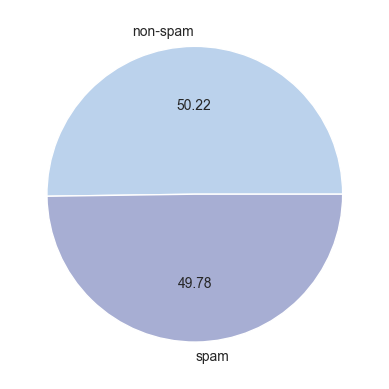

In [1813]:
colors = ['#BBD2EC', '#A7AED3']
plt.pie(Y.value_counts(), labels=['non-spam','spam'], autopct="%0.2f", colors=colors)
plt.show()
#plt.savefig("spam.png")

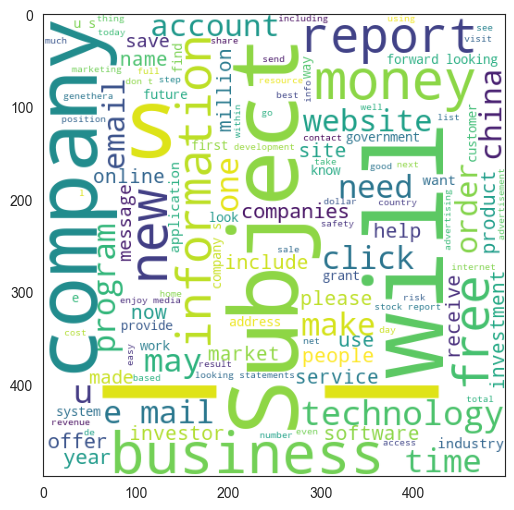

In [1814]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_words = wc.generate(df[Y == 1]['email'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_words)
#plt.savefig("spam_words.png")

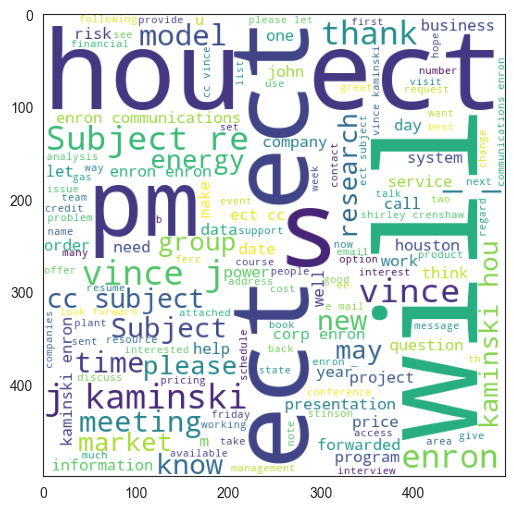

In [1815]:
non_spam_words = wc.generate(df[Y == 0]['email'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(non_spam_words)
#plt.savefig("non_spam_words.png")

#### **TF-IDF matrix**

In [1816]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_df=0.8) # ignore terms that appear in more than 80% of the documents
message = tf.fit_transform(X)

In [1817]:
tf.get_feature_names_out()

array(['00', '000', '0000', ..., 'zwlaszcza', 'zxghlajf', 'zzzz'],
      dtype=object)

#### **CountVectorizer**

In [1818]:
# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer()
# message = cv.fit_transform(X)
# cv.get_feature_names_out()

#### **Data Splitting** (test and train)

In [1819]:
X_train, X_test, y_train, y_test = train_test_split(message, Y, test_size=0.20, random_state=0)

#### **MLP**

In [1820]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [1821]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=100, kernel_regularizer= regularizers.L1(l1=1e-5), activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [1822]:
model.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_197 (Dense)           (None, 100)               1126800   
                                                                 
 dense_198 (Dense)           (None, 64)                6464      
                                                                 
 dense_199 (Dense)           (None, 128)               8320      
                                                                 
 dense_200 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1141713 (4.36 MB)
Trainable params: 1141713 (4.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1823]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [1824]:
history = model.fit(X_train.toarray(), y_train, batch_size=64, epochs=40, verbose=1, validation_split=0.2)

Epoch 1/40
5/5 [==============================] - 2s 115ms/step - loss: 0.8074 - accuracy: 0.6875 - val_loss: 0.7754 - val_accuracy: 0.9167
Epoch 2/40
5/5 [==============================] - 0s 47ms/step - loss: 0.7472 - accuracy: 0.9965 - val_loss: 0.7098 - val_accuracy: 0.9583
Epoch 3/40
5/5 [==============================] - 0s 47ms/step - loss: 0.6582 - accuracy: 1.0000 - val_loss: 0.6202 - val_accuracy: 0.9722
Epoch 4/40
5/5 [==============================] - 0s 50ms/step - loss: 0.5303 - accuracy: 1.0000 - val_loss: 0.5039 - val_accuracy: 0.9722
Epoch 5/40
5/5 [==============================] - 0s 48ms/step - loss: 0.3699 - accuracy: 1.0000 - val_loss: 0.3742 - val_accuracy: 0.9722
Epoch 6/40
5/5 [==============================] - 0s 45ms/step - loss: 0.2163 - accuracy: 1.0000 - val_loss: 0.2656 - val_accuracy: 0.9722
Epoch 7/40
5/5 [==============================] - 0s 44ms/step - loss: 0.1169 - accuracy: 1.0000 - val_loss: 0.1919 - val_accuracy: 0.9722
Epoch 8/40
5/5 [==========

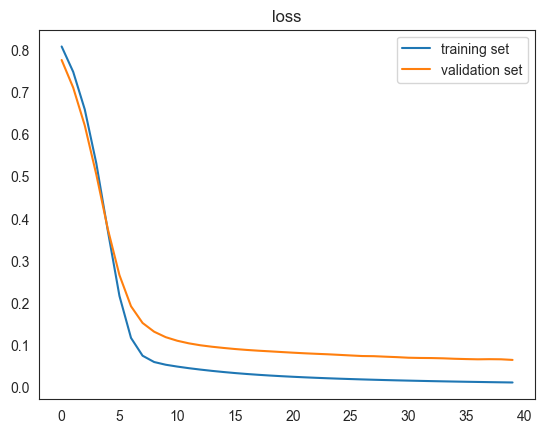

In [1825]:
epochs = history.epoch
plt.plot(epochs, history.history['loss'], label="training set") # blue
plt.plot(epochs, history.history['val_loss'], label="validation set") #orange
plt.title('loss')
plt.legend()
plt.savefig("loss.png")

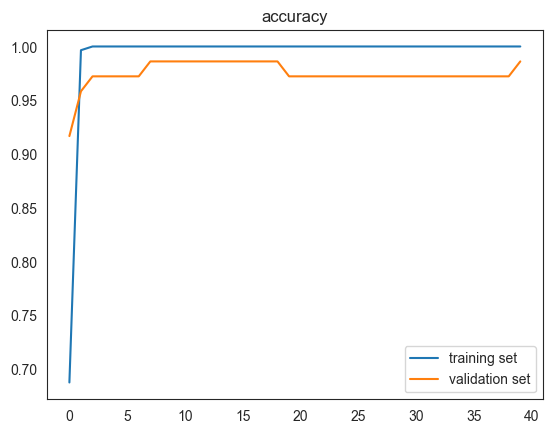

In [1826]:
plt.plot(epochs, history.history['accuracy'], label="training set") #blue
plt.plot(epochs, history.history['val_accuracy'], label="validation set") #orange
plt.title('accuracy')
plt.savefig("accuracy.png")
plt.legend()

In [1827]:
model.evaluate(X_test.toarray(), y_test, batch_size=64)

2/2 [==============================] - 0s 11ms/step - loss: 0.1239 - accuracy: 0.9556


[0.12394661456346512, 0.9555555582046509]

In [1828]:
y_pred = model.predict(X_test.toarray())

3/3 [==============================] - 0s 6ms/step


#### **Metrics**

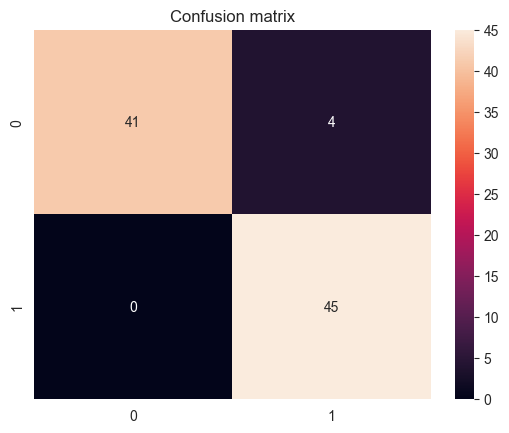

In [1835]:
y_pred_new = [int(not(i<0.5)) for i in y_pred]

cm=confusion_matrix(y_test, y_pred_new)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [1836]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        45
           1       0.92      1.00      0.96        45

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



In [1837]:
precision_score(y_test, y_pred_new)

0.9183673469387755